<a href="https://colab.research.google.com/github/MtFeather/AI-and-Security/blob/master/tensorflow/Test_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  TensorFlow GPU與CPU執行效能比較

建立performanceTest函數，以TensorFlow執行矩陣運算，測試不同的矩陣大小，運用GPU與CPU執行效能

### 先匯入模組

In [0]:
import tensorflow as tf 
import time

#### 定義performanceTest函數，傳入下列參數
  - device_name:設定要使用GPU或CPU進行運算
  - size:設定要建立矩陣的大小

In [0]:
def performanceTest(device_name,size):
    with tf.device(device_name):                           # 使用 tf.device 將一些操作固定到 CPU 和 GPU 上
        W = tf.random_normal([size, size],name='W')        # 從正態分佈中輸出隨機值
        X = tf.random_normal([size, size],name='X')        # 從正態分佈中輸出隨機值
        mul = tf.matmul(W, X,name='mul')                   # 將W,X兩個矩陣相乘
        sum_result = tf.reduce_sum(mul,name='sum')         # 將tensor加總起來 

    startTime = time.time()                                # 取得現在時間(1970紀元後經過的浮點秒數)
    tfconfig=tf.ConfigProto(log_device_placement=True)     # 找出您的指令和張量被分配到哪個設備
    with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)
    takeTimes=time.time()  - startTime                     # 現在秒數減掉開始秒數取得總時間
    print(device_name," size=",size,"Time:",takeTimes )
    return takeTimes                                       # 回傳時間

### 以for迴圈執行performanceTest函數

以for迴圈分別以GPU與CPU執行不同的矩陣大小(500x500、1000x1000、....5000x5000)，測試執行效能
  - gpu_set: 儲存gpu秒數之陣列
  - cpu_set: 儲存cpu秒數之陣列
  - i_set: 執行次數

In [15]:
gpu_set=[];cpu_set=[];i_set=[]
for i in range(0,5001,500):
    g=performanceTest("/gpu:0",i)
    c=performanceTest("/cpu:0",i)
    gpu_set.append(g);cpu_set.append(c);i_set.append(i)
    print("--")

/gpu:0  size= 0 Time: 0.019131898880004883
/cpu:0  size= 0 Time: 0.015375614166259766
--
/gpu:0  size= 500 Time: 0.022574901580810547
/cpu:0  size= 500 Time: 0.04163789749145508
--
/gpu:0  size= 1000 Time: 0.018708229064941406
/cpu:0  size= 1000 Time: 0.10360908508300781
--
/gpu:0  size= 1500 Time: 0.023761749267578125
/cpu:0  size= 1500 Time: 0.22504639625549316
--
/gpu:0  size= 2000 Time: 0.04615592956542969
/cpu:0  size= 2000 Time: 0.3682131767272949
--
/gpu:0  size= 2500 Time: 0.04183602333068848
/cpu:0  size= 2500 Time: 0.7162916660308838
--
/gpu:0  size= 3000 Time: 0.054409027099609375
/cpu:0  size= 3000 Time: 1.1101202964782715
--
/gpu:0  size= 3500 Time: 0.06661868095397949
/cpu:0  size= 3500 Time: 1.7346398830413818
--
/gpu:0  size= 4000 Time: 0.0965726375579834
/cpu:0  size= 4000 Time: 2.4203429222106934
--
/gpu:0  size= 4500 Time: 0.12030148506164551
/cpu:0  size= 4500 Time: 3.4000797271728516
--
/gpu:0  size= 5000 Time: 0.15374135971069336
/cpu:0  size= 5000 Time: 4.5155181

### 將執行結果以圖形顯示 

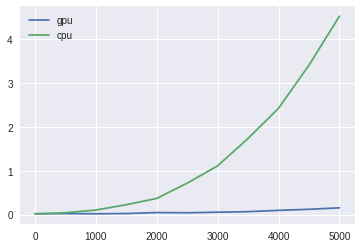

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt            # 匯入模組
fig = plt.gcf()                            # 得到當前的 figure
fig.set_size_inches(6,4)                   # 設定圖示大小 
plt.plot(i_set, gpu_set, label = 'gpu')    # 將gpu數值填入
plt.plot(i_set, cpu_set, label = 'cpu')    # 將cpu數值填入
plt.legend()                               # 在軸上放置圖例            

上圖X軸是矩陣大小，Y軸是執行時間，矩陣越大，CPU與 GPU的差距越大。也就是說，矩陣越大，越能發揮使用GPU的效能